In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import pairwise_distances, segpath2path, point2segments
from analysis_by_plot import myttests, myboxplot

In [2]:
n_trial = 100
n_epoch_train, n_epoch_test = 120, 500
goal_idx = -1  # does not change too much
ls_model = 'pure-pursuit', 'visual-localisor', 'lamb'
ls_model_keys = ls_model
ls_model_name = 'pure-pursuit', 'visual-localisor', 'differential-MB'
ls_color = 'tab:blue', 'tab:orange', 'tab:green'
n_model = len(ls_model)

ls_value = 0, 0.1, 0.2, 0.5, 1, 2, 5, 10, #20, 50
n_condition = len(ls_value)
catchment_radius = 0.372 / 2 ## 0.372 is the wheel axle length of Freight

## 4 sets of data

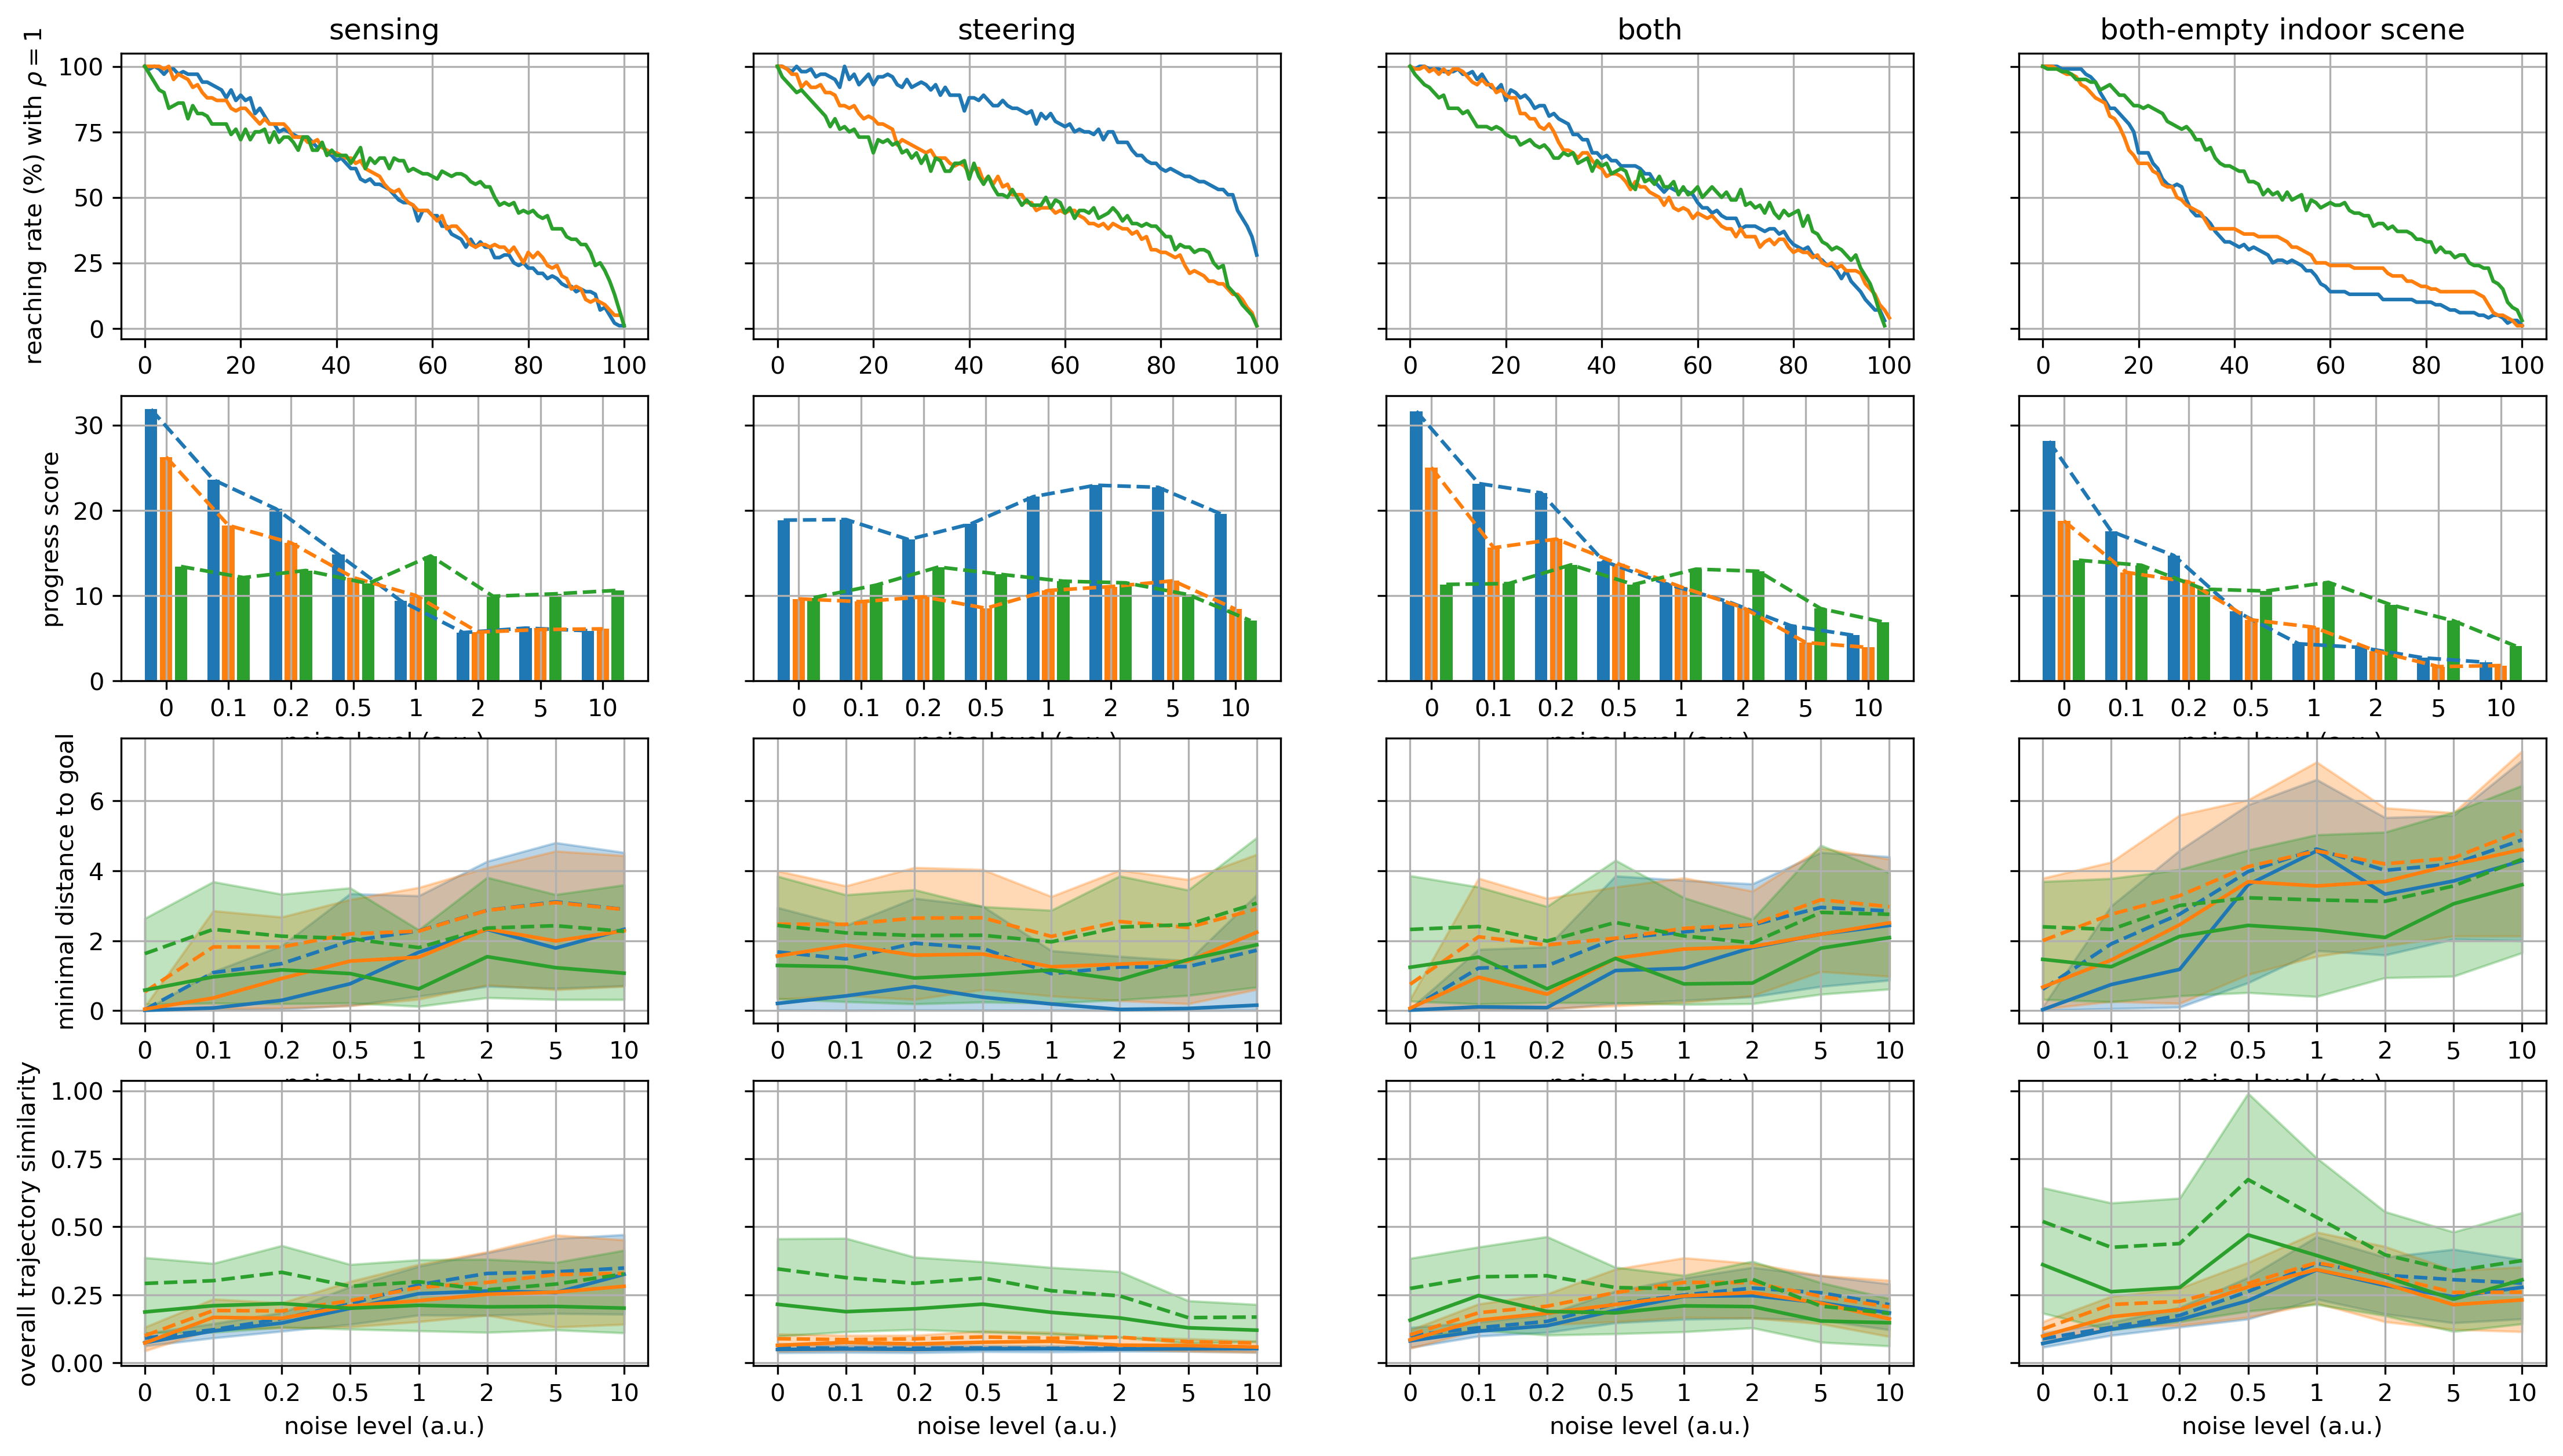

In [3]:
fig, axes = plt.subplots(4, 4, sharex='row', sharey='row', figsize=(18, 10), dpi=300)


for axcol, datafile_randomroute in zip(axes.T, ['sensor_noisefreetrain_robustness_3in1_randomroute.npy',
                                                 'motor_robustness_3in1_randomroute.npy',
                                                 'noise_noisefreetrain_robustness_3in1_randomroute.npy',
                                                 'noise_noisefreetrain_robustness_3in1_randomroute_noobj.npy']):
    data_randomroute = np.load(os.path.join('records/data_randomroute', datafile_randomroute), allow_pickle=True)[()]
    dx, ax, bx, cx = axcol

    for xoffset, model_name, color in zip(np.arange(n_model) - n_model / 2 + 0.5, ls_model_name, ls_color):
        wd = 0.6 / n_model
        xbar = np.arange(n_condition) + xoffset * (wd + 0.04)
        
        area_success, min_dist2goal, dsim_test2train, n_reach = [data_randomroute[key][model_name] for key in ('area_success', 'min_dist2goal', 'dsim_test2train', 'noise1_reach')]
        ax.bar(xbar, area_success, label=model_name, width=wd, color=color)
        ax.plot(xbar, area_success, ls='dashed', color=color)
        
        dx.plot(*n_reach, color=color)

        for bc, data in zip((bx, cx), (min_dist2goal, dsim_test2train)):
            quant = np.nanquantile(data, (0.25, 0.5, 0.75), axis=1)
            avg = np.nanmean(data, axis=1)
            bc.plot(np.arange(n_condition), avg, color=color, ls='dashed')
            bc.plot(np.arange(n_condition), quant[1], color=color, label=model_name)
            bc.fill_between(np.arange(n_condition), quant[0], quant[2], color=color, alpha=0.3)

for ax in axes[1:].flatten():
    ax.grid()
    ax.set_xticks(np.arange(n_condition), ls_value)
    ax.set_xlabel('noise level (a.u.)')
            
for ax, tt in zip(axes[0], ('sensing', 'steering', 'both', 'both-empty indoor scene')):
    ax.set_title(tt)
    ax.grid()
    
for ax, yl in zip(axes.T[0], (r'reaching rate (%) with $\rho=1$', 'progress score', 'minimal distance to goal', 'overall trajectory similarity')):
    ax.set_ylabel(yl)

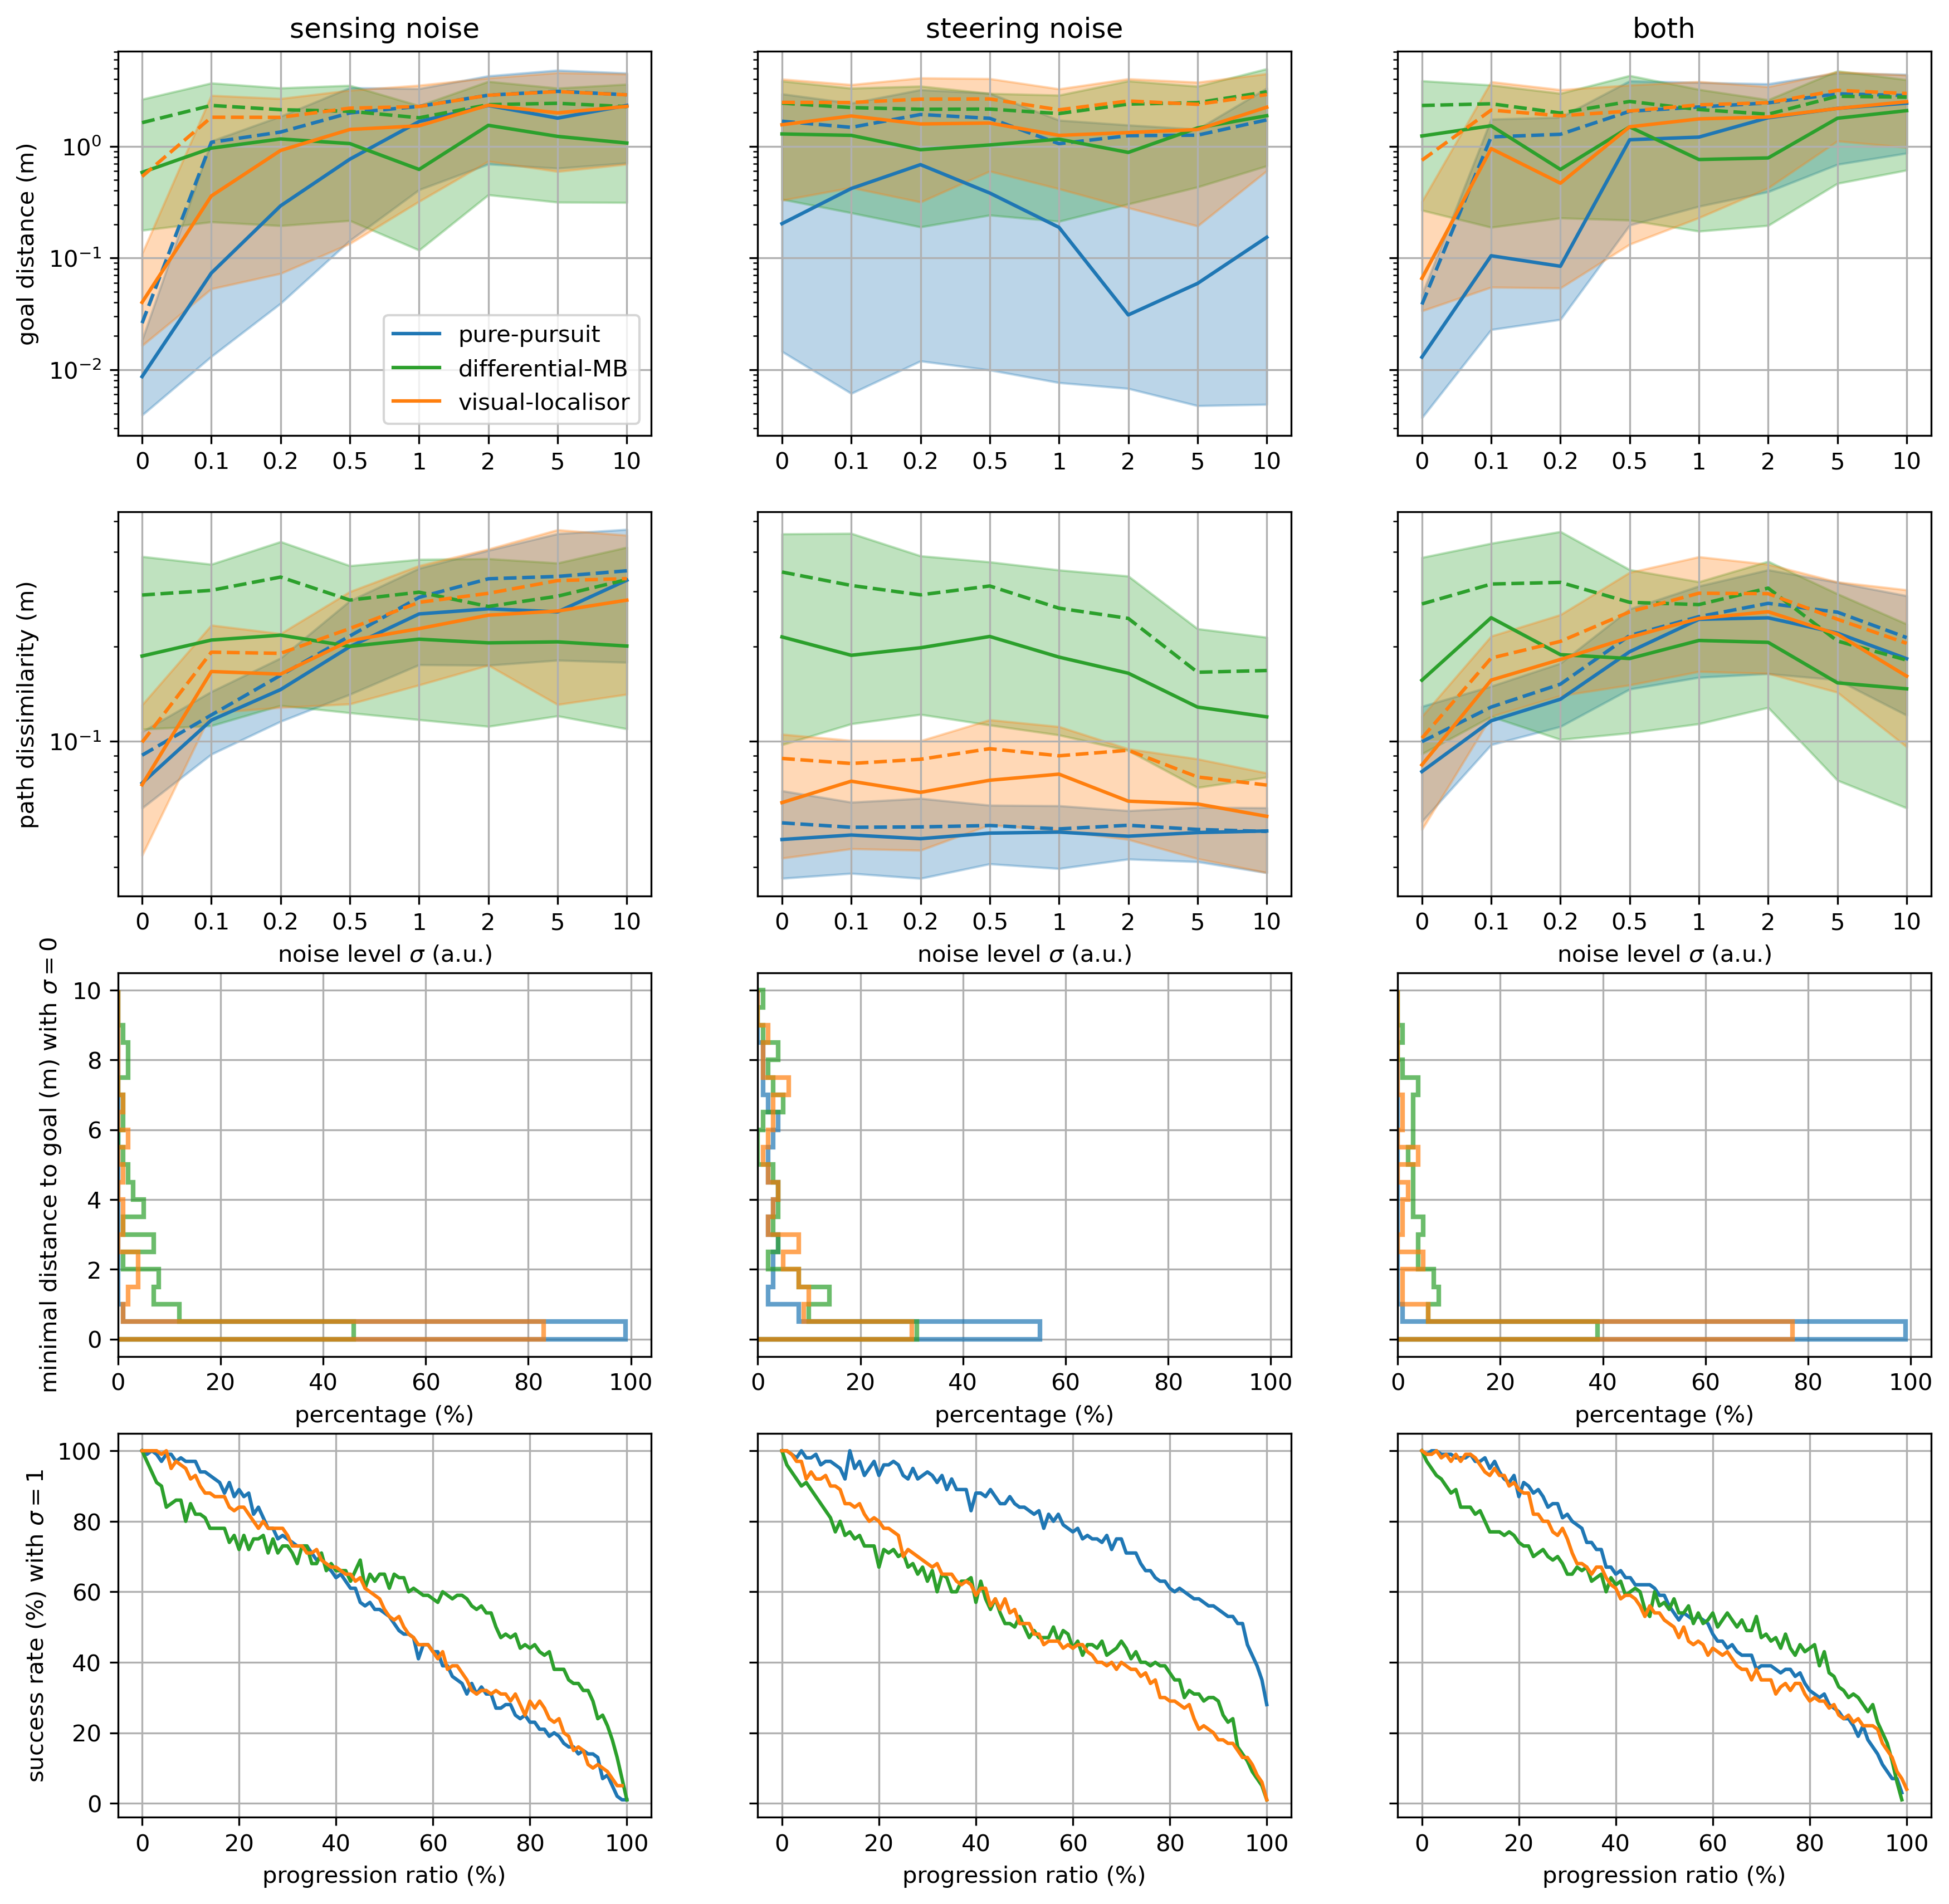

In [4]:
fig, axes = plt.subplots(4, 3, sharex='row', sharey='row', figsize=(14, 14), dpi=300)


for axcol, datafile_randomroute in zip(axes.T, ['sensor_noisefreetrain_robustness_3in1_randomroute.npy',
                                                 'motor_robustness_3in1_randomroute.npy',
                                                 'noise_noisefreetrain_robustness_3in1_randomroute.npy']):
    data_randomroute = np.load(os.path.join('records/data_randomroute', datafile_randomroute), allow_pickle=True)[()]
    bx, cx, ex, dx = axcol

    for model_name, color in np.array(list(zip(ls_model_name, ls_color)))[[0, 2, 1]]:
        
        min_dist2goal, dsim_test2train, n_reach = [data_randomroute[key][model_name] for key in ('min_dist2goal', 'dsim_test2train', 'noise1_reach')]
                                                                         
        ex.hist(min_dist2goal[0], label=model_name,
                    bins=20, #[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], #200, 
                    range=(0, 10),
                    color=color, orientation='horizontal', histtype='step', alpha=0.7, lw=2)                                                         
                        
        dx.plot(*n_reach, color=color, label=model_name)                                    

        for bc, data in zip((bx, cx), (min_dist2goal, dsim_test2train)):
            quant = np.nanquantile(data, (0.25, 0.5, 0.75), axis=1)
            avg = np.nanmean(data, axis=1)
            bc.plot(np.arange(n_condition), avg, color=color, ls='dashed')
            bc.plot(np.arange(n_condition), quant[1], color=color, label=model_name)
            bc.fill_between(np.arange(n_condition), quant[0], quant[2], color=color, alpha=0.3)

for ax in axes[:2].flatten():
    ax.set_xticks(np.arange(n_condition), ls_value)
    ax.set_yscale('log')
    
for ax in axes[1]:
    ax.set_xlabel(r'noise level $\sigma$ (a.u.)')
            
for ax, tt in zip(axes[0], ('sensing noise', 'steering noise', 'both')):
    ax.set_title(tt)
    
for ax in axes[2]:
    ax.set_xlabel('percentage (%)')
#     ax.set_yscale('log')
    
for ax in axes[3]:
    ax.set_xlabel('progression ratio (%)')
    
for ax, yl in zip(axes.T[0], ('goal distance (m)', 
                              'path dissimilarity (m)', 
                              r'minimal distance to goal (m) with $\sigma=0$',
                              r'success rate (%) with $\sigma=1$')):
    ax.set_ylabel(yl)
    
axes[0, 0].legend()

for ax in axes.flatten():
    ax.grid()

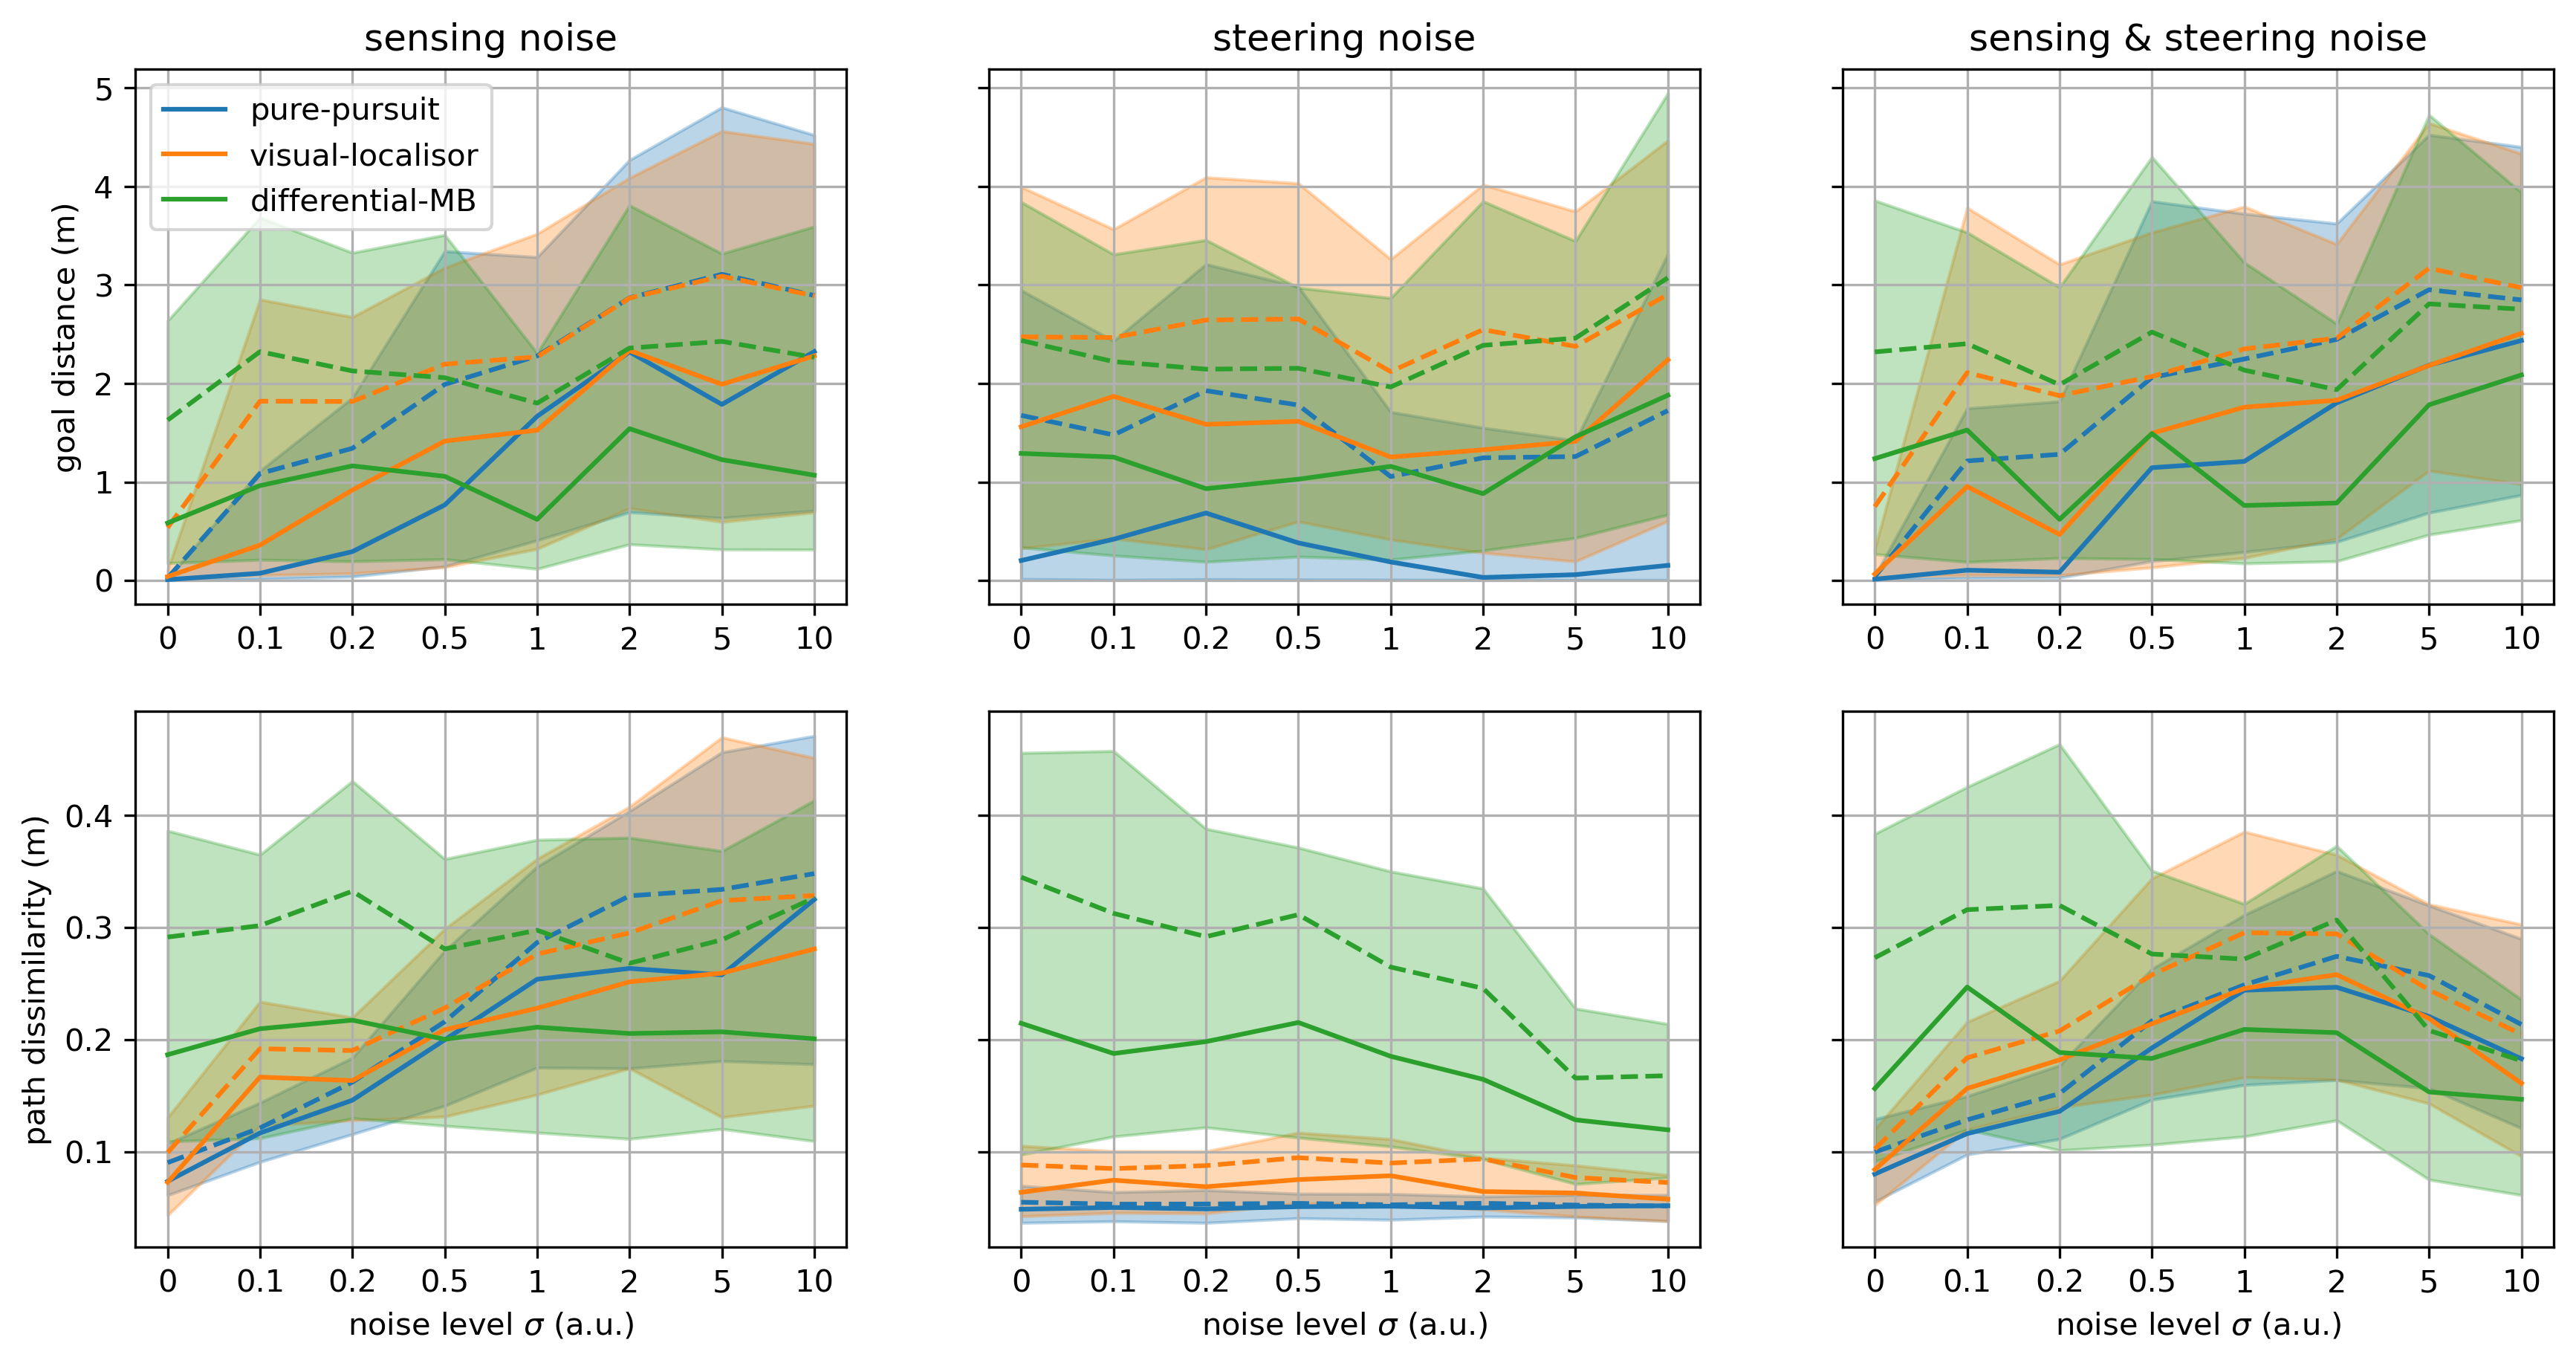

In [5]:
fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(14, 7), dpi=300)


for axcol, datafile_randomroute in zip(axes.T, ['sensor_noisefreetrain_robustness_3in1_randomroute.npy',
                                                 'motor_robustness_3in1_randomroute.npy',
                                                 'noise_noisefreetrain_robustness_3in1_randomroute.npy']):
    data_randomroute = np.load(os.path.join('records/data_randomroute', datafile_randomroute), allow_pickle=True)[()]
    bx, cx = axcol

    for xoffset, model_name, color in zip(np.arange(n_model) - n_model / 2 + 0.5, ls_model_name, ls_color):
#         wd = 0.6 / n_model
#         xbar = np.arange(n_condition) + xoffset * (wd + 0.04)
        
        area_success, min_dist2goal, dsim_test2train, n_reach = [data_randomroute[key][model_name] for key in ('area_success', 'min_dist2goal', 'dsim_test2train', 'noise1_reach')]
# #         ax.bar(xbar, area_success, label=model_name, width=wd, color=color)
# #         ax.plot(xbar, area_success, ls='dashed', color=color)
        
#         dx.plot(*n_reach, color=color, label=model_name)

        for bc, data in zip((bx, cx), (min_dist2goal, dsim_test2train)):
            quant = np.nanquantile(data, (0.25, 0.5, 0.75), axis=1)
            avg = np.nanmean(data, axis=1)
            bc.plot(np.arange(n_condition), avg, color=color, ls='dashed')
            bc.plot(np.arange(n_condition), quant[1], color=color, label=model_name)
            bc.fill_between(np.arange(n_condition), quant[0], quant[2], color=color, alpha=0.3)

for ax in axes.flatten():
    ax.grid()
    ax.set_xticks(np.arange(n_condition), ls_value)
#     ax.set_yscale('log')
    
for ax in axes[-1]:
    ax.set_xlabel(r'noise level $\sigma$ (a.u.)')
            
for ax, tt in zip(axes[0], ('sensing noise', 'steering noise', 'sensing & steering noise')):
    ax.set_title(tt)
    
for ax, yl in zip(axes.T[0], ('goal distance (m)', 'path dissimilarity (m)')):
    ax.set_ylabel(yl)
    
axes[0, 0].legend(loc=2)

# one set data

In [6]:
# record_dir = 'sensor_learn_robustness_3in1_randomroute'  # sensor noise in vision and vector 
# record_dir = 'sensor_noisefreetrain_robustness_3in1_randomroute'  #### no sensor noise in learning
# record_dir = 'sensory_robustness_3in1_randomroute'  # only visual noise but no vector noise in learning # nice result
# var_name = 'noise_sensor'

# record_dir = 'motor_learn_robustness_3in1_randomroute'  # noise in vector memory too
# record_dir = 'motor_robustness_3in1_randomroute'  #### no noise in vector memory 
# var_name = 'noise_motor' 

record_dir = 'noise_noisefreetrain_robustness_3in1_randomroute'  #### nice result
# record_dir = 'noise_noisefreetrain_robustness_3in1_randomroute_noobj'  ####
var_name = 'noise'


# 'motor_robustness_3in1_randomexplore': training route is randomly generated by random walk, not shortest path


In [7]:
data_path = np.load(os.path.join('records', record_dir, 'data_path.npy'), allow_pickle=True)[()]

In [8]:
data_dist_test2goal, data_min_dist2goal, data_time_min_dist2goal = {}, {}, {}
data_dist_testtrunc2goal = {}
data_time_catchment = {}
data_test_cp_ratio = {}
data_dist_init2goal = {}

for model_name in ls_model_name:
    path_train_init = data_path[model_name]['train'][:n_condition, :, :, 0]
    path_train_goal = data_path[model_name]['train'][:n_condition, :, :, -1]
    dist_init2goal = np.linalg.norm(path_train_goal - path_train_init, axis=-1)
    dist_test2goal = np.linalg.norm(path_train_goal[:, :, :, np.newaxis] - data_path[model_name]['test'][:n_condition], axis=2)
    time_min_dist2goal = np.argmin(dist_test2goal, axis=2)
    min_dist2goal = np.min(dist_test2goal, axis=2)
    
    data_dist_test2goal[model_name] = dist_test2goal
    data_min_dist2goal[model_name] = min_dist2goal
    data_time_min_dist2goal[model_name] = time_min_dist2goal
    
    nan_mask = (time_min_dist2goal.T < np.tile(np.arange(n_epoch_test), (n_condition, n_trial, 1)).T).T
    nan_mask_path = np.moveaxis(np.tile(nan_mask, (2, 1, 1, 1)), 0, 2)
    data_dist_testtrunc2goal[model_name] = np.where(nan_mask, np.nan, dist_test2goal)
    data_path[model_name]['test_trunc'] = np.where(nan_mask_path, np.nan, data_path[model_name]['test'][:n_condition])

    time_catchment = np.argmax(dist_test2goal <= catchment_radius, axis=-1)
    data_time_catchment[model_name] = np.where(time_catchment == 0, np.nan, time_catchment)
    
    # test collision, proximity
    data_test_cp_ratio[model_name] = {}
    for cp in 'cp':
        key_cp = 'test_{}'.format(cp)
        test_cp_trunc = np.where(nan_mask, 0, data_path[model_name][key_cp][:n_condition])
#         data_test_cp_ratio[model_name][key_cp] = np.count_nonzero(test_cp_trunc, axis=-1) / (time_min_dist2goal + 1)
        data_test_cp_ratio[model_name][key_cp] = np.count_nonzero(test_cp_trunc, axis=-1)
    
    data_dist_init2goal = dist_init2goal

In [9]:
data_dsim_test2train, data_dist_test2path = {}, {}

for model_name in ls_model_name:
    model_dsim_test2train, model_dist_test2path = [], []
    for path_train_val, path_test_val, time_mindist_test2goal_val in zip(data_path[model_name]['train'], 
                                                                          data_path[model_name]['test_trunc'],
                                                                          data_time_min_dist2goal[model_name]):
        val_time_mindist = []
        val_dist_test2path = np.full((n_trial, n_epoch_test), np.nan)
        for trial_idx, (path_train_trial, path_test_trial, time_mindist) in enumerate(zip(path_train_val, 
                                                                                        path_test_val, 
                                                                                        time_mindist_test2goal_val)):
            dsim_test2train, dist_test2path = segpath2path(path_test_trial.T[:time_mindist + 1], path_train_trial.T)
            val_time_mindist.append(dsim_test2train)
            val_dist_test2path[trial_idx, :time_mindist + 1] = dist_test2path
        model_dsim_test2train.append(val_time_mindist)
        model_dist_test2path.append(val_dist_test2path)
        
    data_dsim_test2train[model_name] = np.array(model_dsim_test2train)
    data_dist_test2path[model_name] = np.array(model_dist_test2path)
#################### dsim

<ipython-input-10-fed560c1dca6>:39: RuntimeWarning: Mean of empty slice
  cx.plot(progress_step, np.nanmean(val_ptime, axis=0), color=color, ls='dashed')
/home/yihelu/miniconda3/envs/python3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/yihelu/miniconda3/envs/python3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


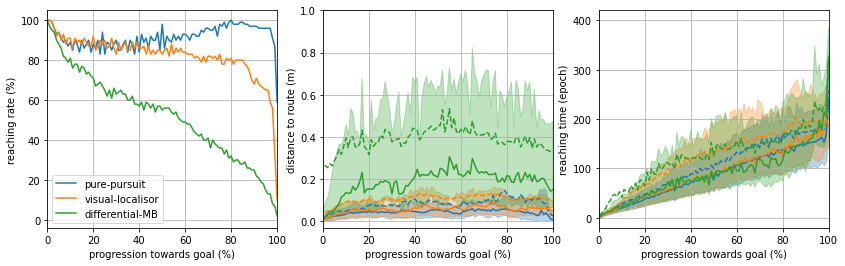

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex='row')

vidx = 0

data_noise1_reach = {}

bx, ax, cx = axes
for model_name, color in zip(ls_model_name, ls_color):

    dist_test2goal, dist_test2path = data_dist_test2goal[model_name][vidx], data_dist_test2path[model_name][vidx]
    progress = np.rint((1 - np.divide(dist_test2goal.T, dist_test2goal[:, 0]).T) * 100)
    progress_step = np.arange(np.nanmin(progress), np.nanmax(progress) + 1)

    val_test2path, val_n_point = [], []
    val_ptime = []
    for trial_progress, trial_test2path in zip(progress, dist_test2path):
        px, pxidx, pxinv = np.unique(trial_progress, return_index=True, return_inverse=True)
        pxinvsort = np.argsort(pxinv)
        t2p_interp = np.interp(progress_step, pxinv[pxinvsort], trial_test2path[pxinvsort])#, left=np.nan, right=np.nan)
        val_test2path.append(t2p_interp)
        val_n_point.extend(px)

        ptime = np.full_like(progress_step, np.nan)
        ptime[(px[~np.isnan(px)] - np.min(progress_step)).astype(int)] = pxidx[~np.isnan(px)]
        val_ptime.append(ptime)


    ax.plot(progress_step, np.nanmean(val_test2path, axis=0), color=color, ls='dashed')
    ax.plot(progress_step, np.nanmedian(val_test2path, axis=0), color=color)

    ax.fill_between(progress_step, *np.nanquantile(val_test2path, (0.25, 0.75), axis=0), color=color, alpha=0.3)

    
    p_reach, n_reach = np.unique(val_n_point, return_counts=True)
    bx.plot(p_reach, n_reach, color=color, label=model_name)
    data_noise1_reach[model_name] = np.array([p_reach[p_reach >= 0], n_reach[p_reach >= 0]])
    

    cx.plot(progress_step, np.nanmean(val_ptime, axis=0), color=color, ls='dashed')
    cx.plot(progress_step, np.nanmedian(val_ptime, axis=0), color=color)
    cx.fill_between(progress_step, *np.nanquantile(val_ptime, (0.25, 0.75), axis=0), color=color, alpha=0.3)
        
for ax, yl in zip(axes, ('reaching rate (%)', 'distance to route (m)', 'reaching time (epoch)')):
    ax.set_xlim(0, 100)
    ax.grid()
    ax.set_ylabel(yl)
    ax.set_xlabel('progression towards goal (%)')


axes[0].legend()
    
axes[1].set_ylim(-0.03, 0.63)
axes[1].set_yticks(np.arange(0, 1.03, 0.2))

axes[2].set_ylim(-20, 420)
axes[2].set_yticks(np.arange(0, 401, 100))

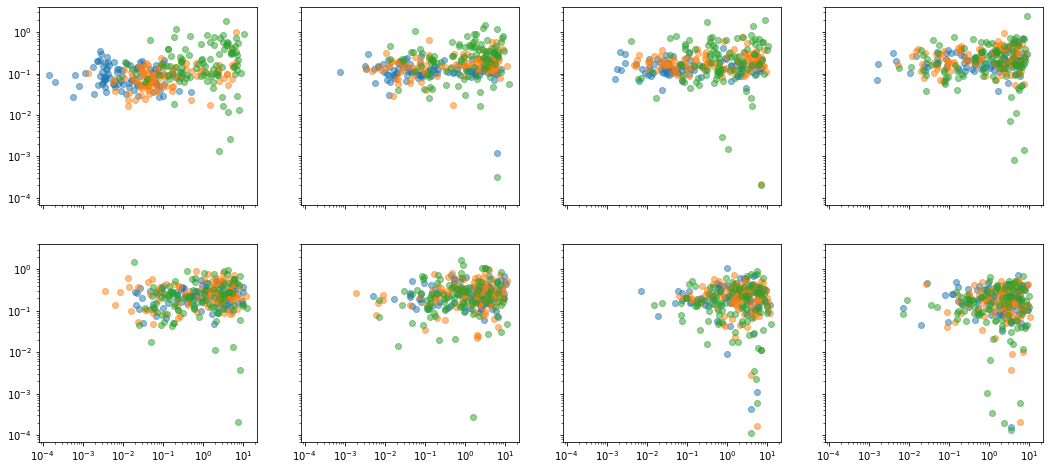

In [11]:
fig, axes = plt.subplots(2, n_condition // 2, figsize=(18, 8), sharex=True, sharey=True)

n_catch = []

for model_name, color in zip(ls_model_name, ls_color):
    for ax, dsim_val, mind_val, in zip(axes.flatten(), data_dsim_test2train[model_name], data_min_dist2goal[model_name]):
        ax.scatter(mind_val, dsim_val, color=color, alpha=0.5)
        n_catch.append(np.count_nonzero(mind_val <= catchment_radius))
        
for ax in axes.flatten():
    ax.set_xscale('log')
# #     ax.axvline(catchment_radius)
    ax.set_yscale('log')

n_catch = np.reshape(n_catch, (3, n_condition))

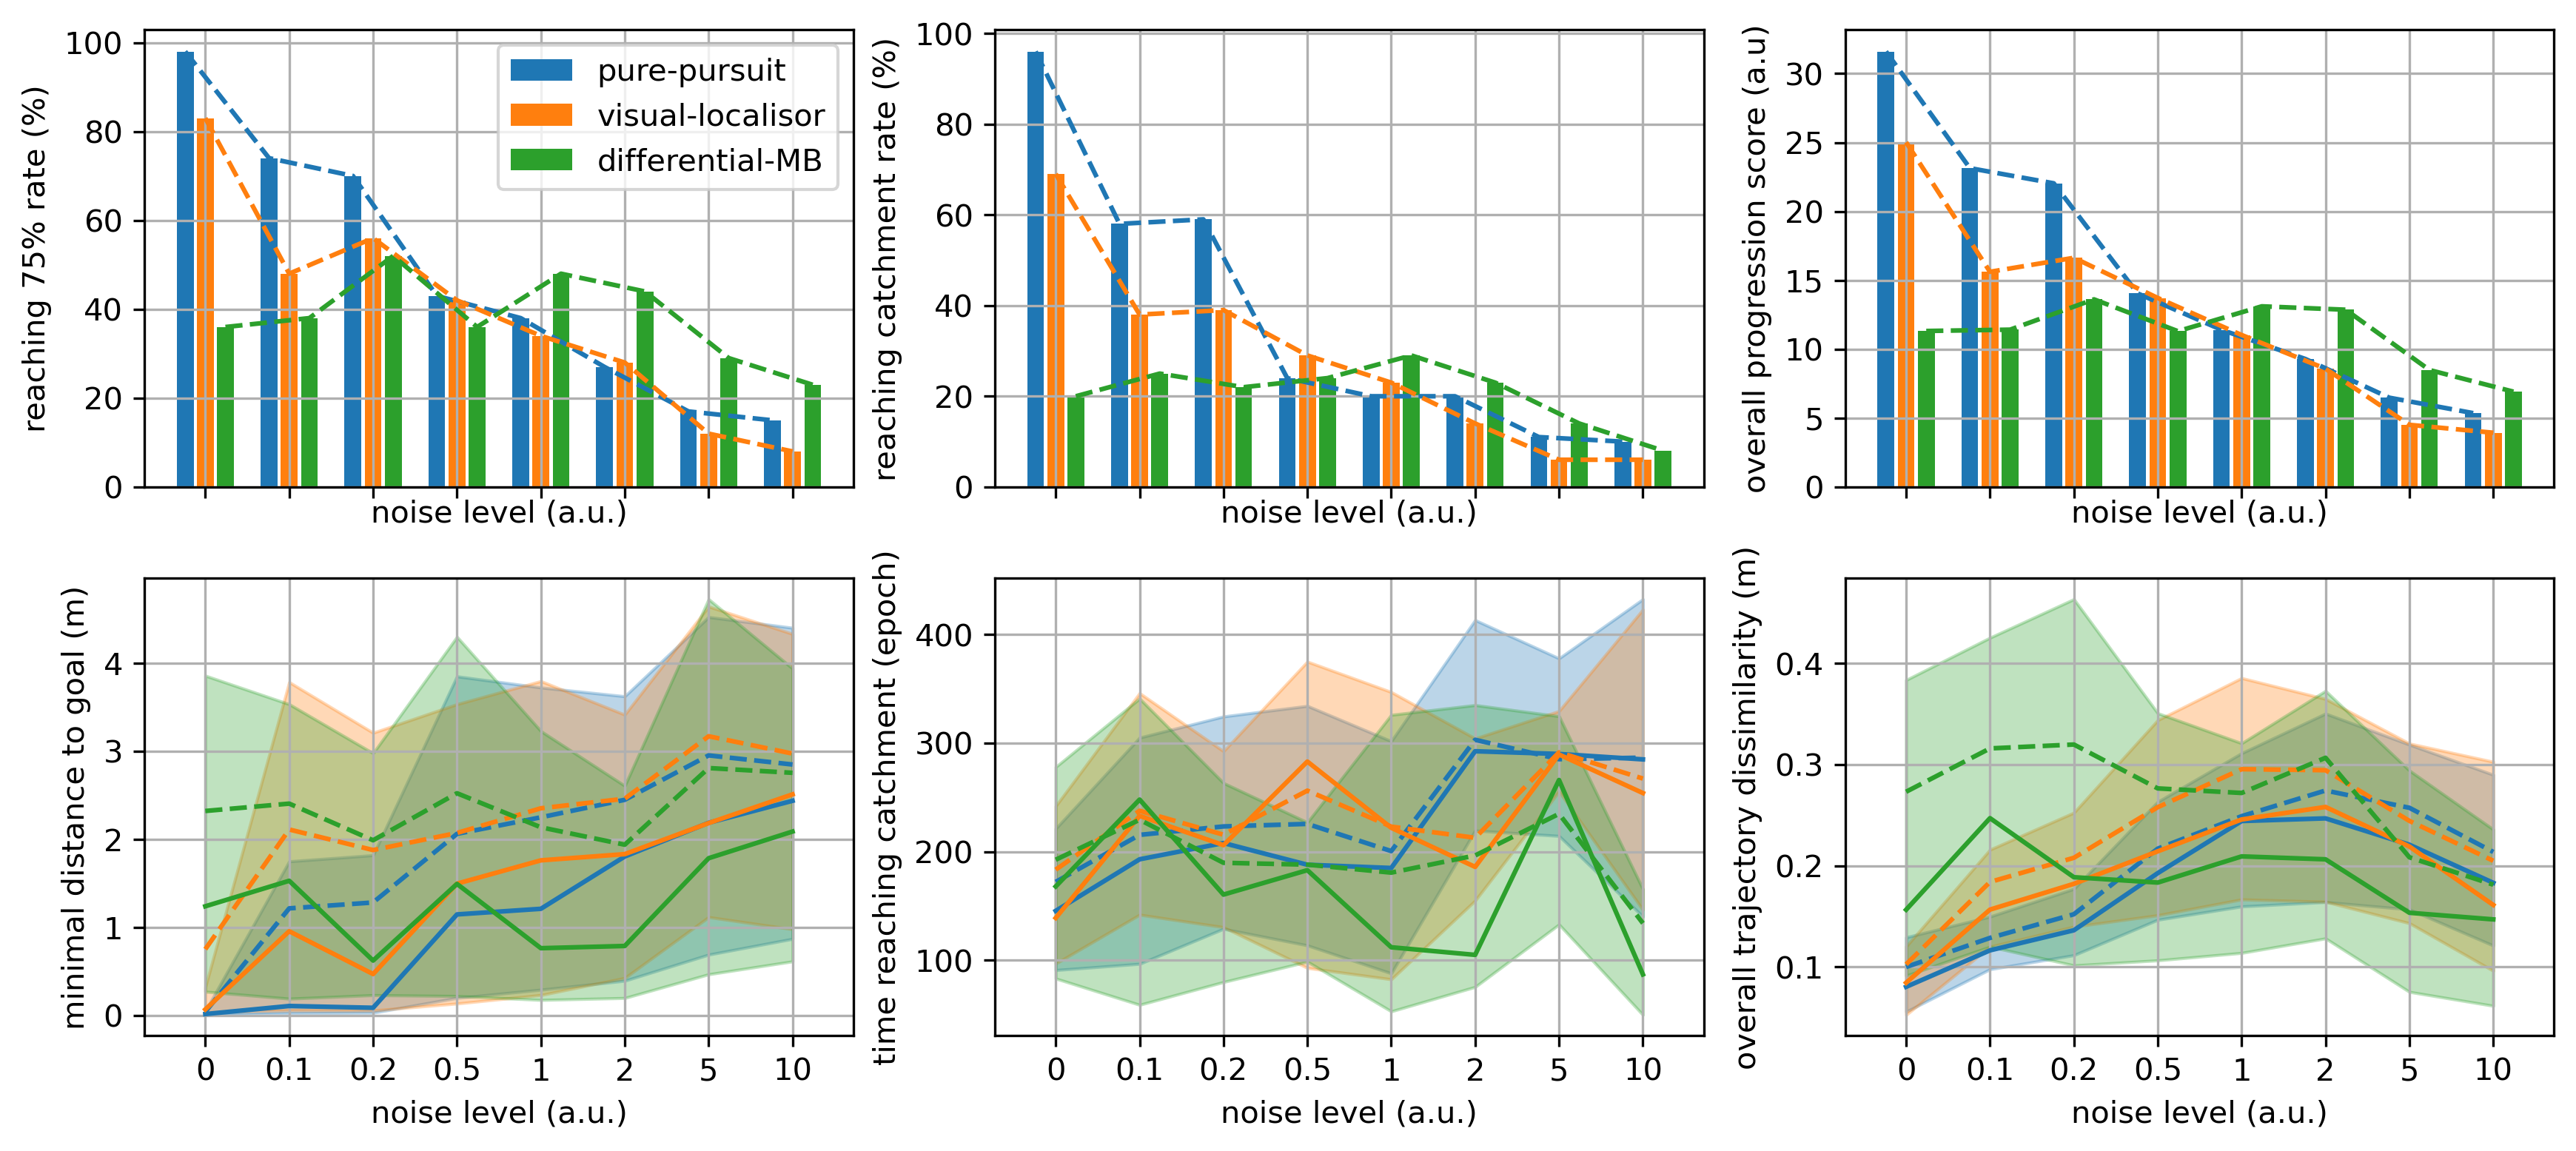

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True, dpi=300)

for model_name, color in zip(ls_model_name, ls_color):
    for ax, data in zip(axes[1], (data_min_dist2goal[model_name], data_time_catchment[model_name], data_dsim_test2train[model_name])):
        quant = np.nanquantile(data, (0.25, 0.5, 0.75), axis=1)
        avg = np.nanmean(data, axis=1)
        ax.plot(np.arange(n_condition), avg, color=color, ls='dashed')
        ax.plot(np.arange(n_condition), quant[1], color=color, label=model_name)
        ax.fill_between(np.arange(n_condition), quant[0], quant[2], color=color, alpha=0.3)

data_area_success = {}
for xoffset, model_name, color, nc in zip(np.arange(n_model) - n_model / 2 + 0.5, ls_model_name, ls_color, n_catch):
    area_success, n_reach_75 = [], []
    for dist_test2goal, dist_test2path in zip(data_dist_test2goal[model_name], data_dist_test2path[model_name]):
        progress = np.rint((1 - np.divide(dist_test2goal.T, dist_test2goal[:, 0]).T) * 100)
        progress_step = np.arange(np.nanmin(progress), np.nanmax(progress) + 1)

        val_n_point = []
        for trial_progress in progress:
            px = np.unique(trial_progress)
            val_n_point.extend(px)

        p_reach, n_reach = np.unique(val_n_point, return_counts=True)
        
        p_reach_75idx = np.nonzero(p_reach >= 75)[0]
        if len(p_reach_75idx) > 0:
            n_reach_75.append(n_reach[p_reach_75idx[0]])
        else:
            n_reach_75.append(0)
        
        p_reach_posidx = np.nonzero(p_reach > 0)
        n_reach_pos = np.interp(np.arange(101), p_reach[p_reach_posidx], n_reach[p_reach_posidx], left=100, right=0)
        
#         area_success.append(np.dot(np.arange(101) / 100, n_reach_pos / 100))
        area_success.append(np.dot((np.arange(101) / 100) ** 2, n_reach_pos / 100))
        
    wd = 0.6 / n_model
#     xbar = np.arange(n_condition) + xoffset * wd * 1.5
    xbar = np.arange(n_condition) + xoffset * (wd + 0.04)
    for ax, yy in zip(axes[0], (n_reach_75, nc, area_success)):
        ax.bar(xbar, yy, label=model_name, width=wd, color=color)
        ax.plot(xbar, yy, ls='dashed', color=color)
        
    data_area_success[model_name] = np.array(area_success)
    
for ax, yl in zip(axes.flatten(), 
                  ('reaching 75% rate (%)', 
                   'reaching catchment rate (%)', 
                   'overall progression score (a.u)',
                   'minimal distance to goal (m)', 
                   'time reaching catchment (epoch)',
                   'overall trajectory dissimilarity (m)')):
    ax.set_ylabel(yl)
    
# for ax in axes[:-1]:
#     ax.set_ylim(top=102)

for ax in axes.flatten():
    ax.grid()
    ax.set_xticks(np.arange(n_condition), ls_value)
    ax.set_xlabel('noise level (a.u.)')
    
# for ax in axes.T[0]:
axes[0, 0].legend(loc=1)

data_randomroute ={'area_success': data_area_success, 'min_dist2goal': data_min_dist2goal, 'dsim_test2train': data_dsim_test2train, 'noise1_reach': data_noise1_reach}
np.save(os.path.join('records/data_randomroute', record_dir), data_randomroute)

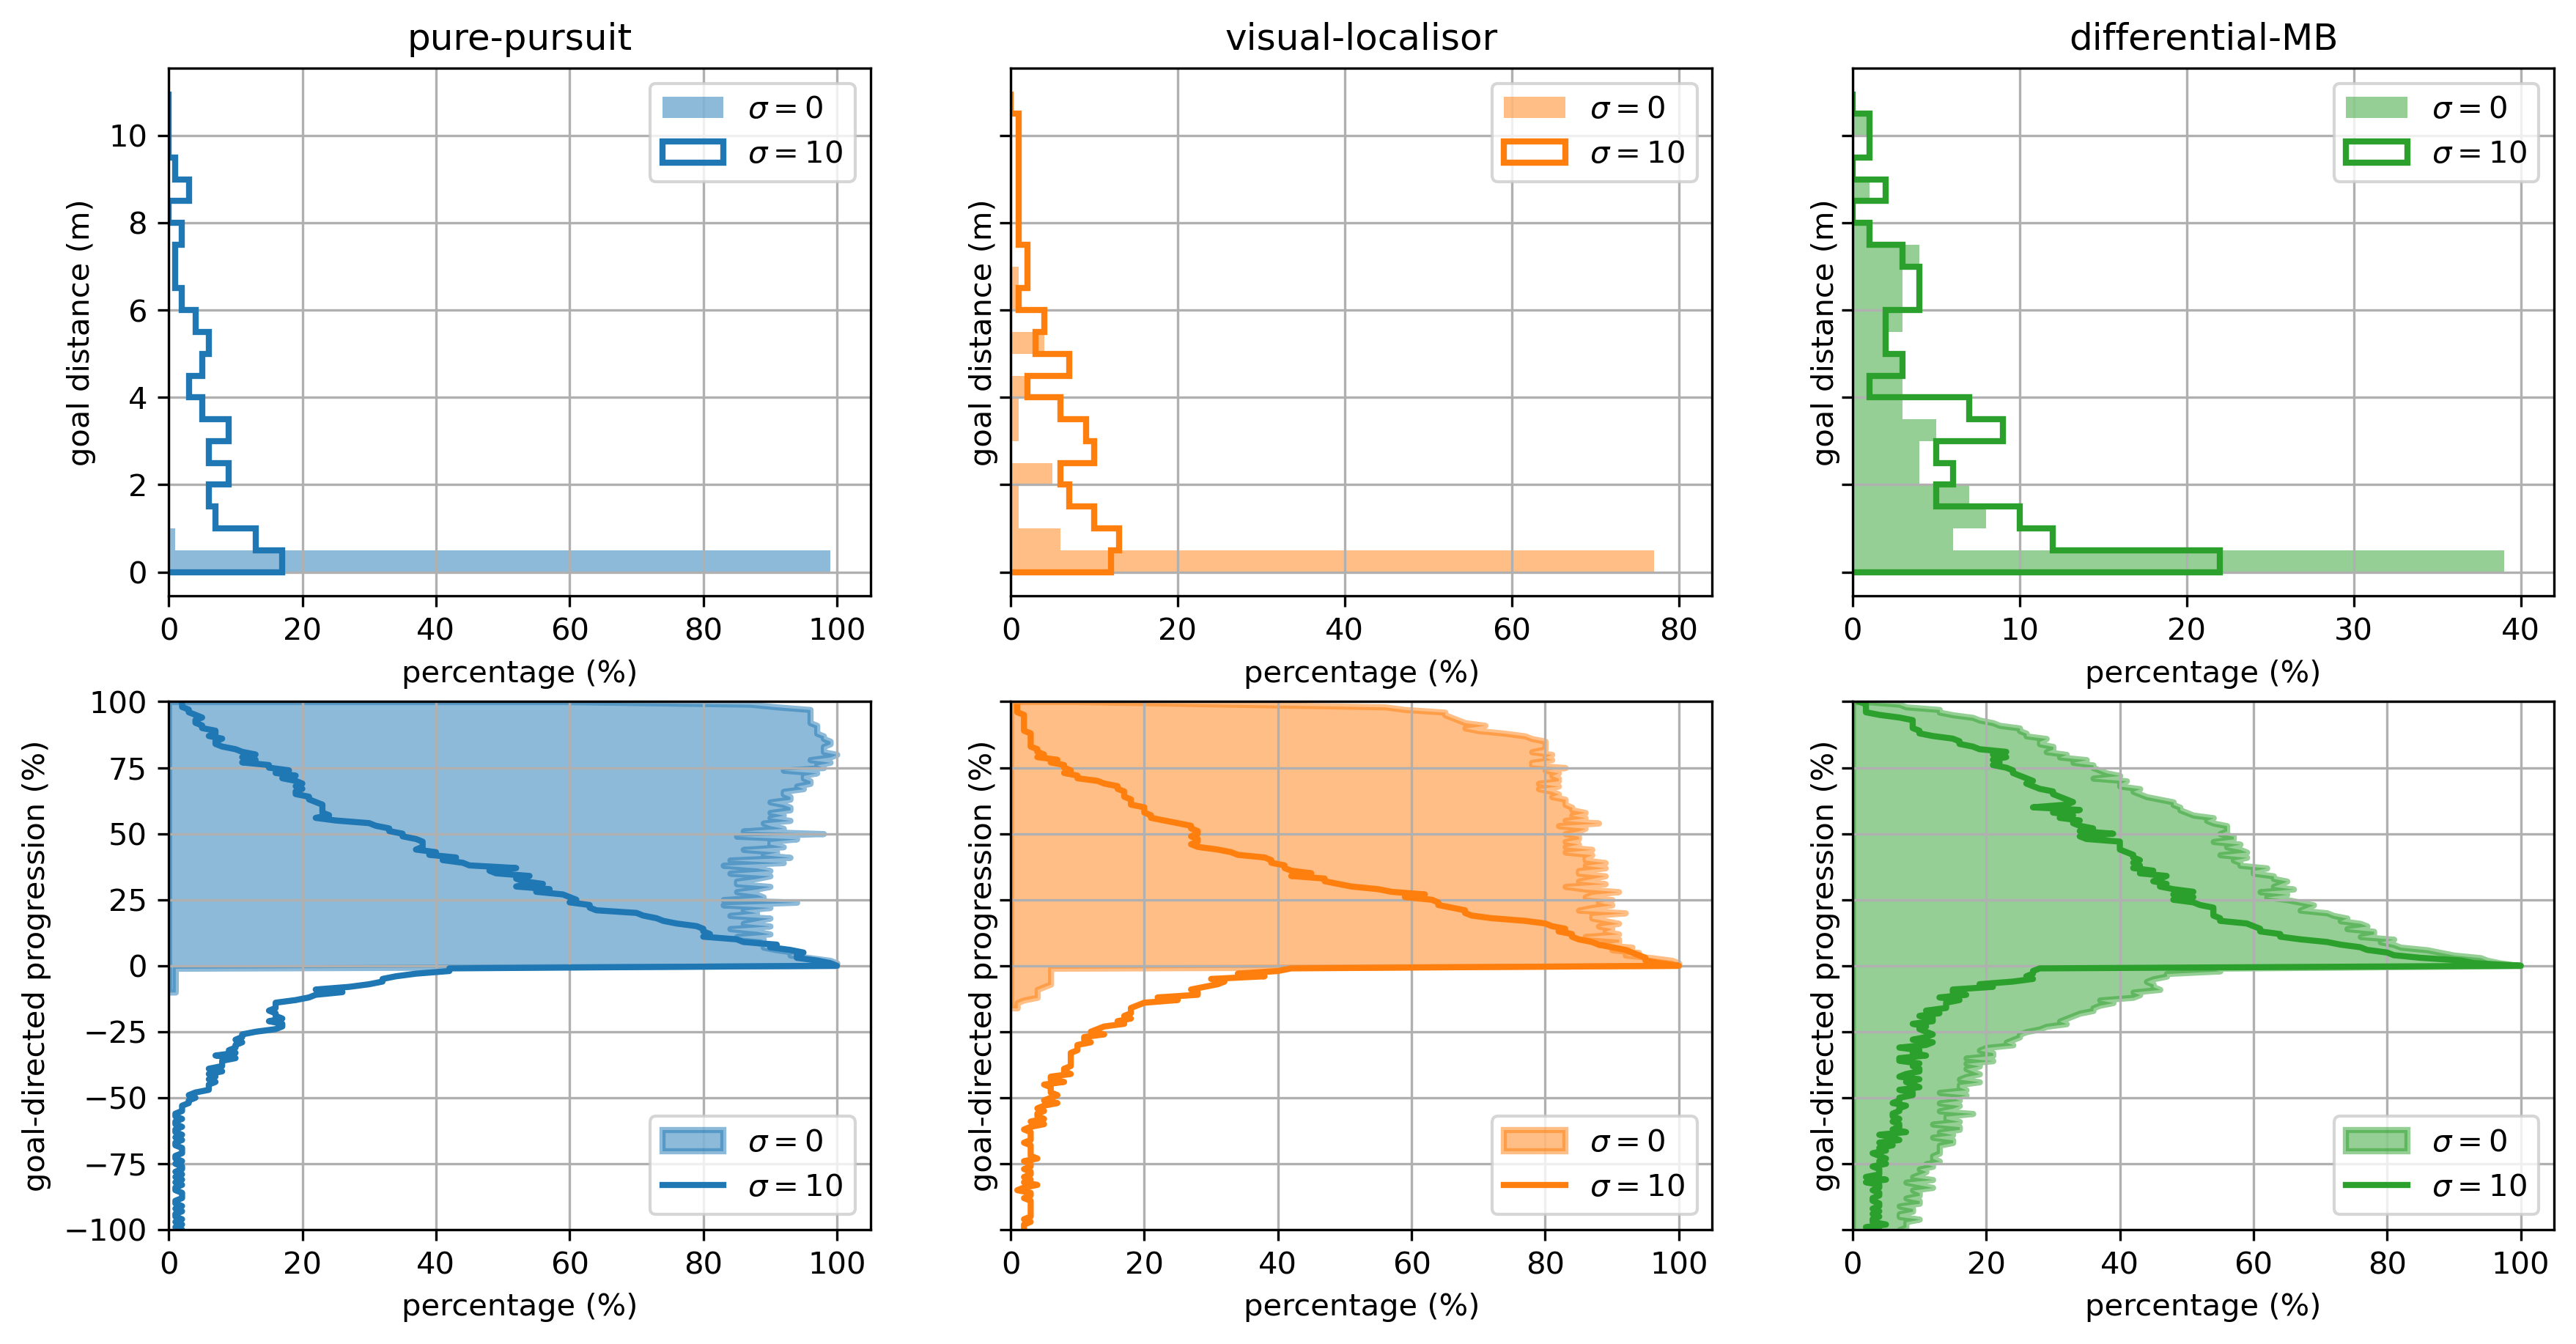

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7), dpi=300, sharey='row')

for model_name, color, axcol in zip(ls_model_name, ls_color, axes.T):
    for vidx, ht, ls, al in zip([0, -1], ('stepfilled', 'step'), ('solid', 'dotted'), (0.5, 1)):
        noise = ls_value[vidx]
        label = r'$\sigma={}$'.format(noise)
        data = data_min_dist2goal[model_name][vidx]
        axcol[0].hist(data, label=label,
            bins=22, #[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], #200, 
            range=(0, 11),
            color=color, orientation='horizontal', histtype=ht, alpha=al, lw=2)        
      
        ###
        dist_test2goal, dist_test2path = data_dist_test2goal[model_name][vidx], data_dist_test2path[model_name][vidx]
        progress = np.rint((1 - np.divide(dist_test2goal.T, dist_test2goal[:, 0]).T) * 100)
        progress_step = np.arange(np.nanmin(progress), np.nanmax(progress) + 1)

        val_test2path, val_n_point = [], []
        val_ptime = []
        for trial_progress, trial_test2path in zip(progress, dist_test2path):
            px, pxidx, pxinv = np.unique(trial_progress, return_index=True, return_inverse=True)
            pxinvsort = np.argsort(pxinv)
            t2p_interp = np.interp(progress_step, pxinv[pxinvsort], trial_test2path[pxinvsort])#, left=np.nan, right=np.nan)
            val_test2path.append(t2p_interp)
            val_n_point.extend(px)

            ptime = np.full_like(progress_step, np.nan)
            ptime[(px[~np.isnan(px)] - np.min(progress_step)).astype(int)] = pxidx[~np.isnan(px)]
            val_ptime.append(ptime)


        p_reach, n_reach = np.unique(val_n_point, return_counts=True)
        if vidx == 0:
            axcol[1].fill_betweenx(p_reach, n_reach, color=color, label=label, lw=2, alpha=al)
        else:
            axcol[1].plot(n_reach, p_reach, color=color, label=label, alpha=al, lw=2)
            
    
for ax, model, xlim in zip(axes[0], ls_model_name, (105, 84, 42)):
    ax.legend(loc=1)
    ax.set_title(model)
    ax.set_xlim(right=xlim)
    ax.set_ylabel('goal distance (m)')
    
for ax in axes[1]:
    ax.set_xlim(0, 105)
    ax.set_ylim(-100, 100)
    ax.legend(loc=4)
    ax.set_ylabel('goal-directed progression (%)')
    
for ax in axes.flatten():
    ax.set_xlabel('percentage (%)')
    ax.grid()

# random route data may need further analysis!!!!

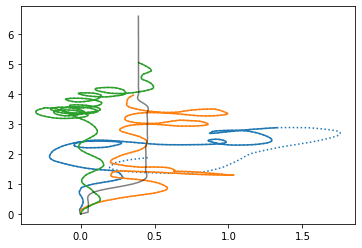

In [15]:
cond_idx = np.random.randint(n_condition)
trial_idx = np.random.randint(n_trial)
for model_name, color in zip(ls_model_name, ls_color):
    plt.plot(*(data_path[model_name]['test'][cond_idx, trial_idx].T - 
               data_path[model_name]['test'][cond_idx, trial_idx].T[0]).T, ls='dotted', color=color)
    plt.plot(*(data_path[model_name]['test_trunc'][cond_idx, trial_idx].T - 
               data_path[model_name]['test_trunc'][cond_idx, trial_idx].T[0]).T, color=color)
plt.plot(*(data_path[model_name]['train'][cond_idx, trial_idx].T -
           data_path[model_name]['train'][cond_idx, trial_idx].T[0]).T, color='k', alpha=0.5)

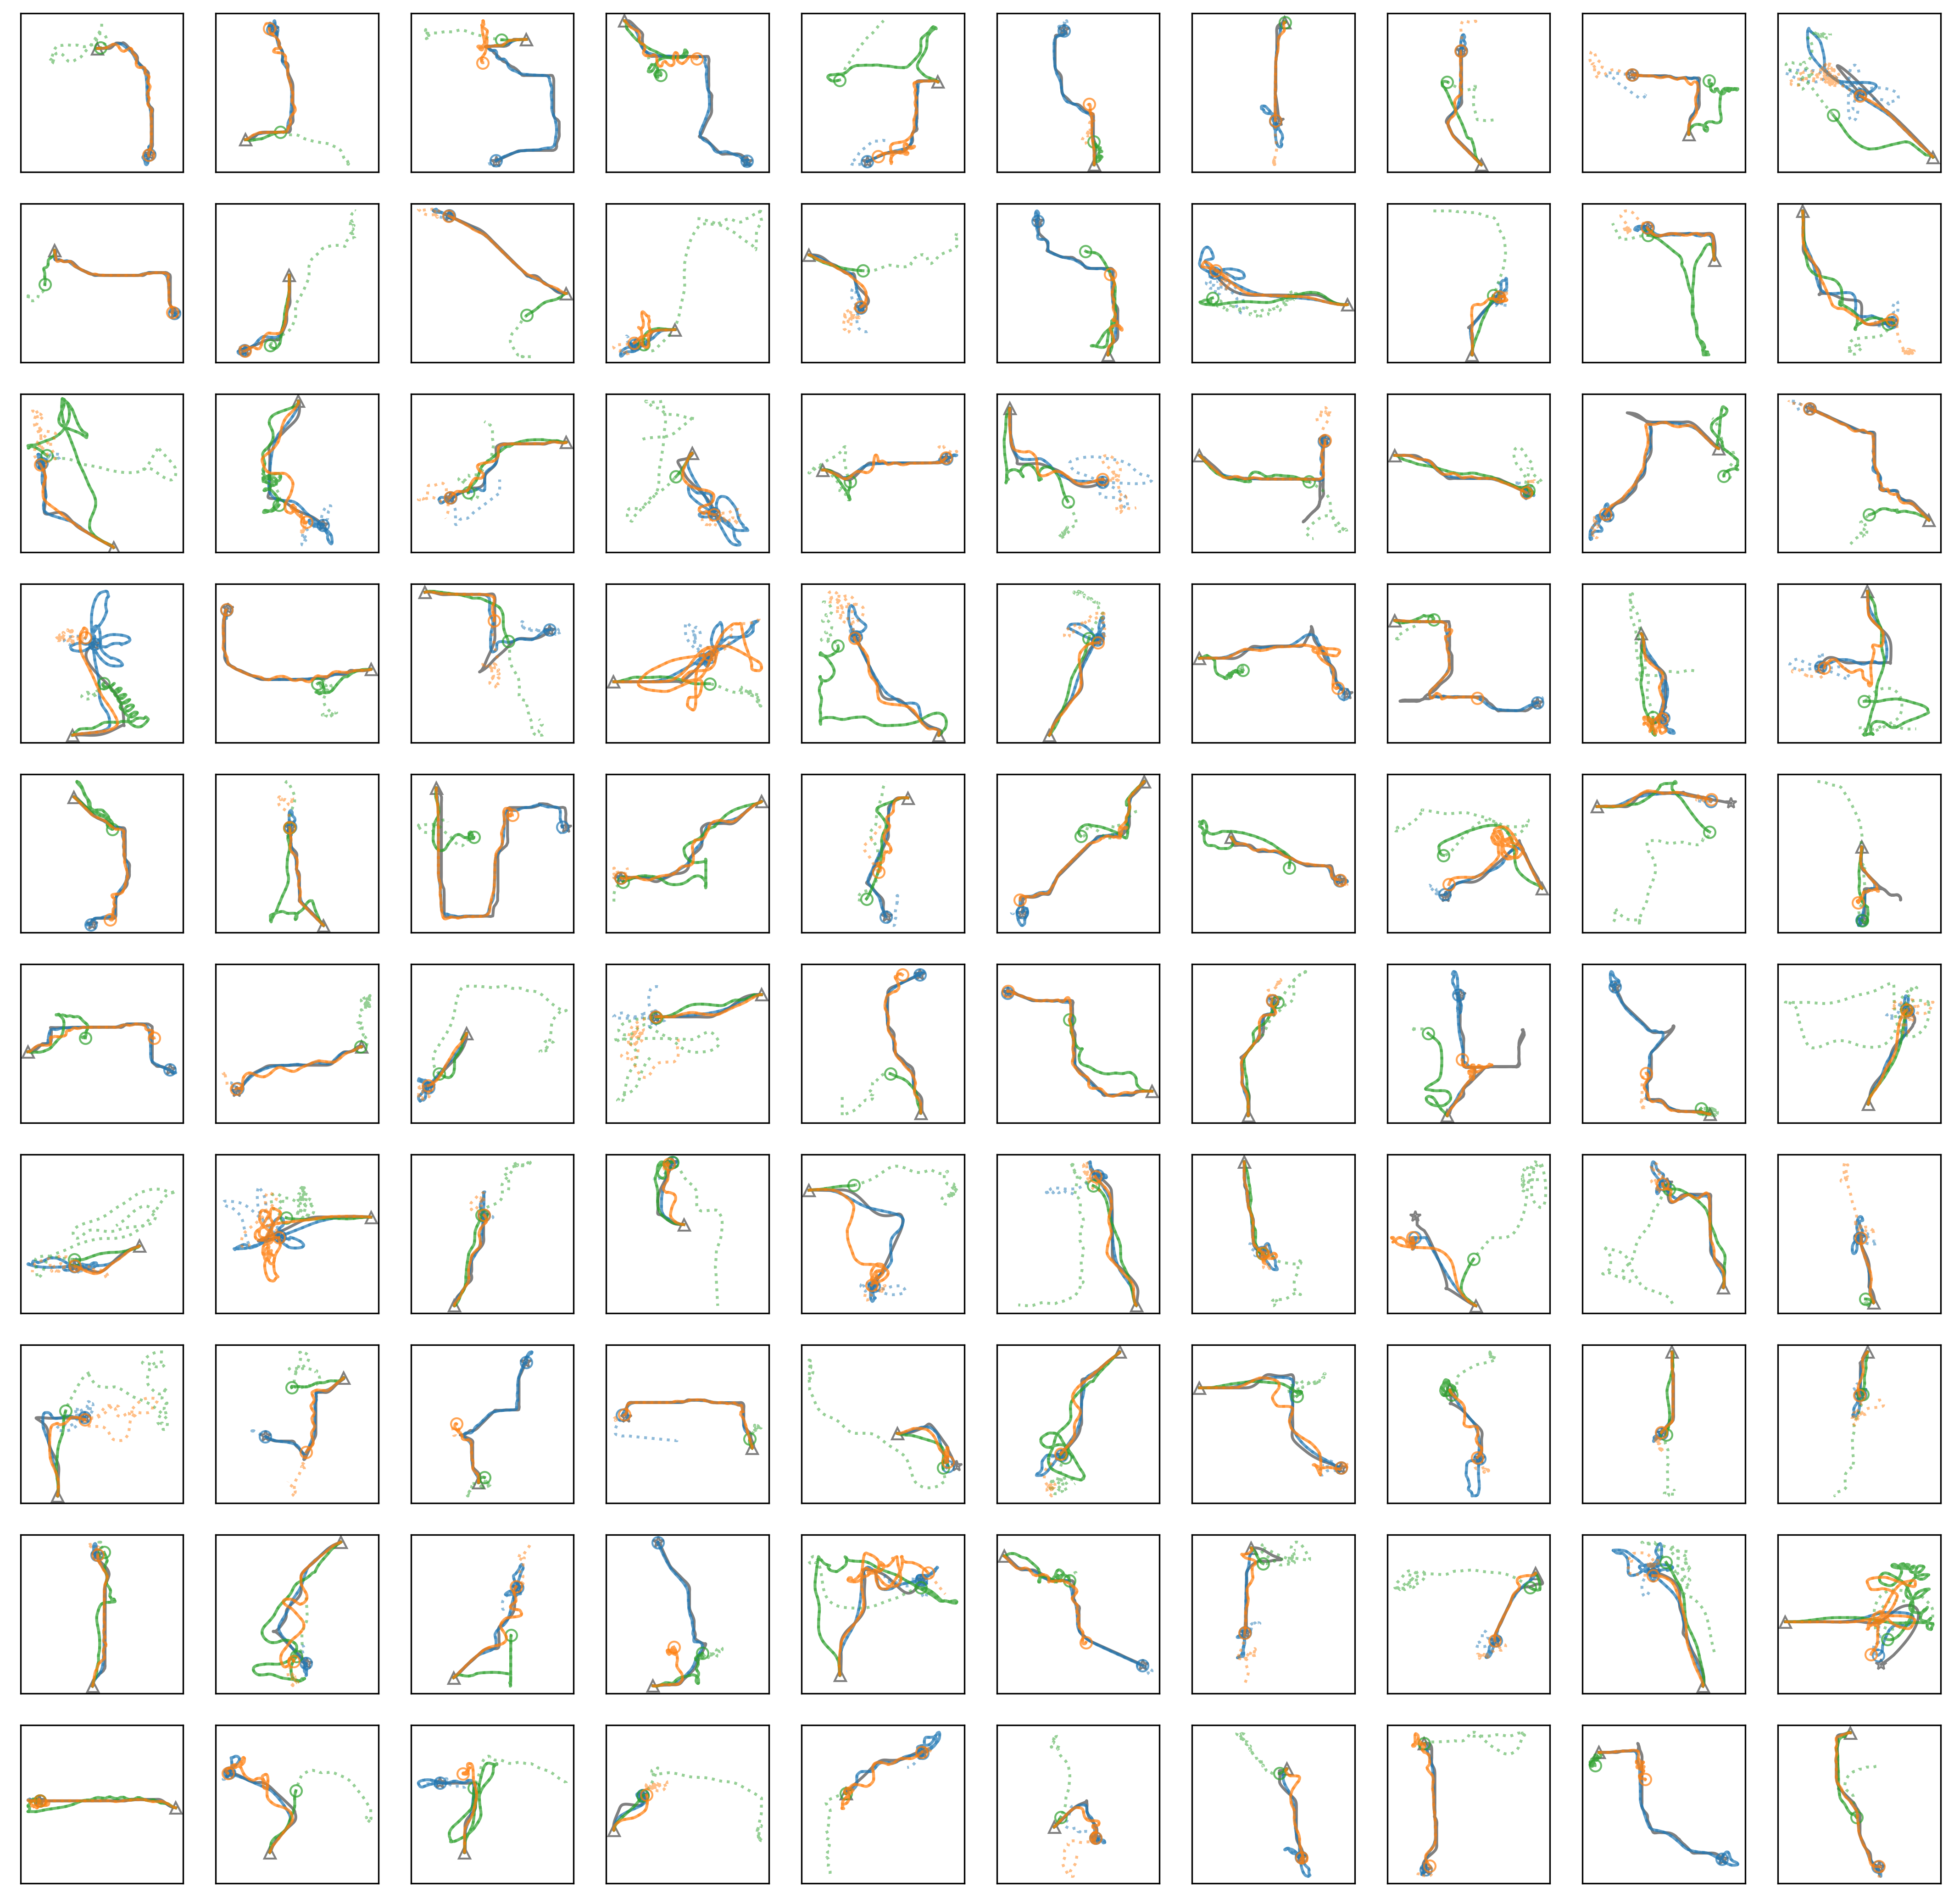

In [16]:
fig, axes = plt.subplots(10, 10, figsize=(18, 18), dpi=300)
cond_idx = 0
for trial_idx, ax in enumerate(axes.flatten()):
    ax.plot(*data_path['pure-pursuit']['train'][cond_idx, trial_idx], color='grey')
    ax.plot(*data_path['pure-pursuit']['train'][cond_idx, trial_idx, :, 0], 
            mfc='none', color='grey', marker='^')
    ax.plot(*data_path['pure-pursuit']['train'][cond_idx, trial_idx, :, -1],
            mfc='none', color='grey', marker='*')
    for model_name, color in zip(np.array(ls_model_name)[[0, 2, 1]], np.array(ls_color)[[0, 2, 1]]):
        ax.plot(*data_path[model_name]['test'][cond_idx, trial_idx], ls='dotted', color=color, alpha=0.5)
        ax.plot(*data_path[model_name]['test_trunc'][cond_idx, trial_idx], 
                ls='solid', color=color, alpha=0.7)
        ax.plot(*data_path[model_name]['test_trunc'][cond_idx, trial_idx, :, data_time_min_dist2goal[model_name][cond_idx, trial_idx]], 
                ls='solid', color=color, alpha=0.7, marker='o', mfc='none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable="datalim")